In [1]:
import razor
import razor.flow as rf
from razor import api
from razor.flow.spark import SparkBlock, SparkExecutor


In [2]:
import os
from datetime import datetime, timedelta
from pyspark.sql import SparkSession, functions
from pyspark.sql.dataframe import DataFrame
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [3]:
def project_space_path(path):
    ps = api.datasources('Project Space')
    return os.path.join(ps.abspath(), path)


In [4]:
from pyspark.sql.functions import pandas_udf, PandasUDFType,collect_set

def get_customer_static_info(input_df):
    customer_static = input_df.select(["customer_name", "card_number", "card_type"])
    return customer_static


In [5]:
@rf.block
class NonSparkPath:
    
#     __publish__ = True
#     __label__ = "Spark read csv block"
#     __description__ = "Read a csv file from project space and output as a spark dataframe"
#     __tags__ = ["spark", "filter", "big data","csv","projectspace"]
#     __category__ = "Spark"
#     __technology__ = razor.Technology.SPARK
    
    # Atomic input - csv filename relative to project space
    ip_path: str
    # Atomic output of type spark DataFrame.
    op_path: rf.Output[str]
    
    def run(self):
        self.op_path.put(project_space_path(self.ip_path))
        

In [6]:
nsp = NonSparkPath(ip_path='customer_data.csv')

In [7]:
nsp.execute()

{'op_path': '/home/aios/projectspace/customer_data.csv'}

In [8]:
@rf.block
class ReadCsvProjectSpace(SparkBlock):
    
#     __publish__ = True
#     __label__ = "Spark read csv block"
#     __description__ = "Read a csv file from project space and output as a spark dataframe"
#     __tags__ = ["spark", "filter", "big data","csv","projectspace"]
#     __category__ = "Spark"
#     __technology__ = razor.Technology.SPARK
    
    # Atomic input - csv filename relative to project space
    filename:str
    # Atomic output of type spark DataFrame.
    data: rf.Output[DataFrame]
    
    def run(self):
        df = self.spark.read.csv(self.filename, header = True)
        print("Hello")
        df.printSchema()
        self.data.put(df)
        

In [9]:
rcp = ReadCsvProjectSpace(filename = nsp.op_path, config={}, source="")
rcp.executor = SparkExecutor

In [10]:
rcp.execute()

In [19]:
@rf.block
class RandomProcess1(SparkBlock):
    
#     __publish__ = True
#     __label__ = "Spark read csv block"
#     __description__ = "Read a csv file from project space and output as a spark dataframe"
#     __tags__ = ["spark", "filter", "big data","csv","projectspace"]
#     __category__ = "Spark"
#     __technology__ = razor.Technology.SPARK
    
    # Atomic input - csv filename relative to project space
    ip_data: DataFrame
    # Atomic output of type spark DataFrame.
    op_data: rf.Output[DataFrame]
    
    def run(self):
        customer_static = get_customer_static_info(self.ip_data)
        customer_static.show()
        self.op_data.put(customer_static)
        
        

In [20]:
rp1 = RandomProcess1(ip_data = rcp.data, config={}, source="")
rp1.executor = SparkExecutor

In [21]:
rp1.execute()

In [13]:
pipe = rf.Pipeline(targets = [rp1])

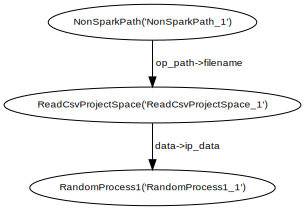

In [14]:
pipe

In [15]:
pipe.execute()

log path: /tmp/tmp7nkl3w27/Pipeline_1


{}